In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import joblib

In [29]:
# Load the pre-scaled dataset
df = pd.read_csv("../../data/processed/dataset.csv")

In [30]:
df.head()

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,242,-0.729352,0.154334,1,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1,302,-0.729352,0.154334,0,6,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1997
2,51,-1.779641,0.154334,1,19,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1994
3,474,0.320937,0.154334,1,6,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1963
4,265,-1.779641,0.154334,1,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1990


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93206 entries, 0 to 93205
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie id      93206 non-null  int64  
 1   rate          93206 non-null  float64
 2   age           93206 non-null  float64
 3   gender        93206 non-null  int64  
 4   occupation    93206 non-null  int64  
 5   Other         93206 non-null  int64  
 6   Action        93206 non-null  int64  
 7   Adventure     93206 non-null  int64  
 8   Animation     93206 non-null  int64  
 9   Children's    93206 non-null  int64  
 10  Comedy        93206 non-null  int64  
 11  Crime         93206 non-null  int64  
 12  Documentary   93206 non-null  int64  
 13  Drama         93206 non-null  int64  
 14  Fantasy       93206 non-null  int64  
 15  Film-Noir     93206 non-null  int64  
 16  Horror        93206 non-null  int64  
 17  Musical       93206 non-null  int64  
 18  Mystery       93206 non-nu

In [32]:
df.describe()

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
count,93206.000000,9.320600e+04,9.320600e+04,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,...,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000,93206.000000
mean,415.571487,1.678664e-16,-7.501385e-16,0.744909,11.067056,0.000086,0.256561,0.138221,0.036596,0.070500,...,0.018014,0.051563,0.049793,0.053087,0.197133,0.128307,0.220082,0.096013,0.019033,1987.647555
std,323.402850,1.000005e+00,1.000005e+00,0.435915,6.644703,0.009264,0.436737,0.345133,0.187770,0.255989,...,0.133002,0.221145,0.217518,0.224208,0.397836,0.334433,0.414304,0.294611,0.136642,14.379940
min,1.000000,-1.779641e+00,-1.214566e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000
25%,173.000000,-7.293518e-01,1.543339e-01,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000
50%,315.000000,3.209373e-01,1.543339e-01,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000
75%,611.000000,3.209373e-01,1.543339e-01,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
max,1682.000000,1.371226e+00,1.543339e-01,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1998.000000


In [33]:
# Prepare features for clustering (exclude movie id, rate, and release_year)
X = df.drop(columns=['movie id', 'rate', 'release_year'])

In [34]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,93206.0,-7.501385e-16,1.000005,-12.14566,0.154334,0.154334,0.154334,0.154334
gender,93206.0,7.449091e-01,0.435915,0.00000,0.000000,1.000000,1.000000,1.000000
occupation,93206.0,1.106706e+01,6.644703,0.00000,4.000000,13.000000,18.000000,20.000000
Other,93206.0,8.583138e-05,0.009264,0.00000,0.000000,0.000000,0.000000,1.000000
Action,93206.0,2.565607e-01,0.436737,0.00000,0.000000,0.000000,1.000000,1.000000
Adventure,93206.0,1.382207e-01,0.345133,0.00000,0.000000,0.000000,0.000000,1.000000
Animation,93206.0,3.659636e-02,0.187770,0.00000,0.000000,0.000000,0.000000,1.000000
Children's,93206.0,7.049975e-02,0.255989,0.00000,0.000000,0.000000,0.000000,1.000000
Comedy,93206.0,2.932322e-01,0.455246,0.00000,0.000000,0.000000,1.000000,1.000000
Crime,93206.0,8.138961e-02,0.273434,0.00000,0.000000,0.000000,0.000000,1.000000


In [35]:
# Data is already pre-scaled, so we can use it directly
print("Dataset shape:", X.shape)
print("Features used for clustering:", X.columns.tolist())

Dataset shape: (93206, 22)
Features used for clustering: ['age', 'gender', 'occupation', 'Other', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [36]:
# Check the data distribution
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,93206.0,-7.501385e-16,1.000005,-12.14566,0.154334,0.154334,0.154334,0.154334
gender,93206.0,7.449091e-01,0.435915,0.00000,0.000000,1.000000,1.000000,1.000000
occupation,93206.0,1.106706e+01,6.644703,0.00000,4.000000,13.000000,18.000000,20.000000
Other,93206.0,8.583138e-05,0.009264,0.00000,0.000000,0.000000,0.000000,1.000000
Action,93206.0,2.565607e-01,0.436737,0.00000,0.000000,0.000000,1.000000,1.000000
Adventure,93206.0,1.382207e-01,0.345133,0.00000,0.000000,0.000000,0.000000,1.000000
Animation,93206.0,3.659636e-02,0.187770,0.00000,0.000000,0.000000,0.000000,1.000000
Children's,93206.0,7.049975e-02,0.255989,0.00000,0.000000,0.000000,0.000000,1.000000
Comedy,93206.0,2.932322e-01,0.455246,0.00000,0.000000,0.000000,1.000000,1.000000
Crime,93206.0,8.138961e-02,0.273434,0.00000,0.000000,0.000000,0.000000,1.000000


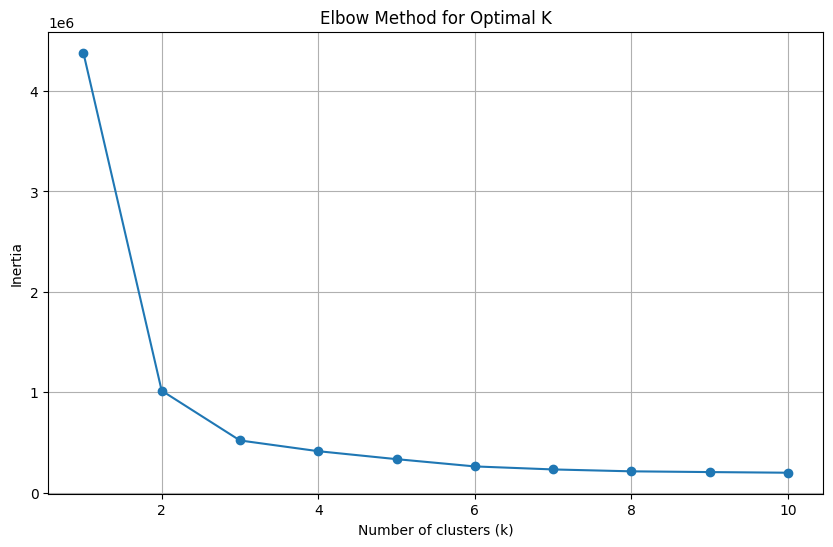

In [37]:
# Find optimal number of clusters using Elbow Method
inertias = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [38]:
# Comprehensive evaluation using multiple metrics
def evaluate_clustering(X, k_range):
    results = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        
        # Calculate metrics
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        davies = davies_bouldin_score(X, labels)
        
        results.append({
            'k': k,
            'silhouette': silhouette,
            'calinski_harabasz': calinski,
            'davies_bouldin': davies,
            'inertia': kmeans.inertia_
        })
    
    return pd.DataFrame(results)

# Evaluate clustering for k from 2 to 10
k_range = range(2, 11)
evaluation_results = evaluate_clustering(X, k_range)
print("Clustering Evaluation Results:")
print(evaluation_results.round(4))

Clustering Evaluation Results:
    k  silhouette  calinski_harabasz  davies_bouldin       inertia
0   2      0.6453        308421.8101          0.4674  1.016767e+06
1   3      0.5736        345353.9966          0.6150  5.209208e+05
2   4      0.4908        297742.5942          0.7589  4.139688e+05
3   5      0.5091        281718.1163          0.6925  3.346903e+05
4   6      0.4810        292679.4552          0.7517  2.623301e+05
5   7      0.4613        277390.3849          0.8594  2.323348e+05
6   8      0.3565        259939.1204          1.0707  2.134774e+05
7   9      0.2949        236060.9129          1.3260  2.060516e+05
8  10      0.2784        216953.9460          1.4434  1.995938e+05


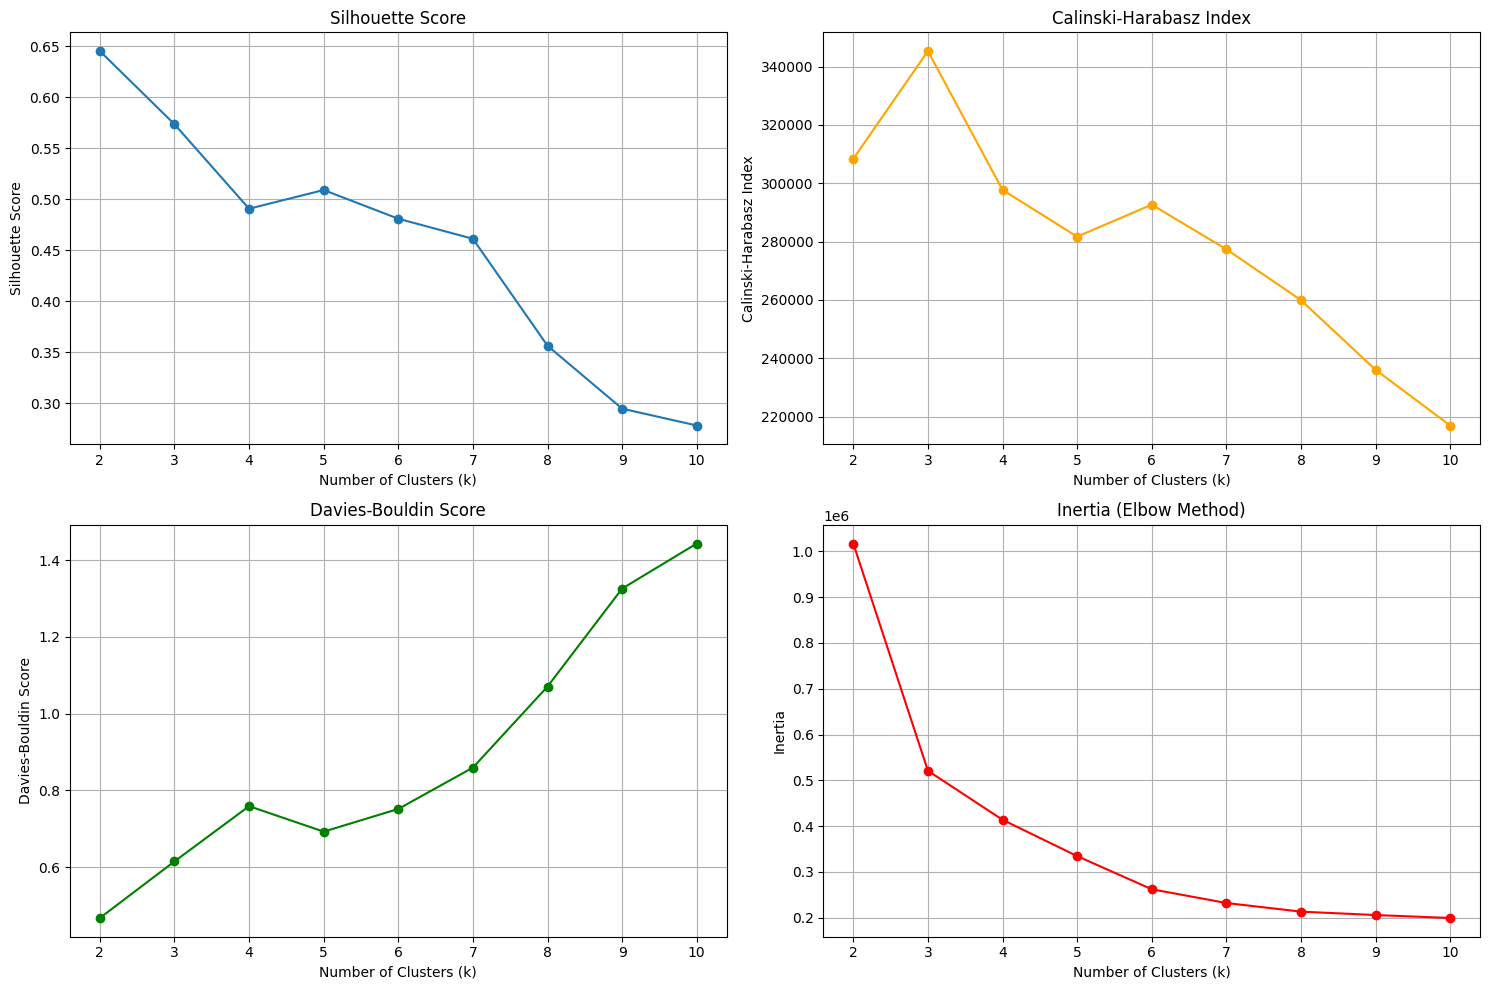

In [39]:
# Visualize evaluation metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Silhouette Score
axes[0, 0].plot(evaluation_results['k'], evaluation_results['silhouette'], marker='o')
axes[0, 0].set_title('Silhouette Score')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].grid(True)

# Calinski-Harabasz Index
axes[0, 1].plot(evaluation_results['k'], evaluation_results['calinski_harabasz'], marker='o', color='orange')
axes[0, 1].set_title('Calinski-Harabasz Index')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Calinski-Harabasz Index')
axes[0, 1].grid(True)

# Davies-Bouldin Score
axes[1, 0].plot(evaluation_results['k'], evaluation_results['davies_bouldin'], marker='o', color='green')
axes[1, 0].set_title('Davies-Bouldin Score')
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Davies-Bouldin Score')
axes[1, 0].grid(True)

# Inertia
axes[1, 1].plot(evaluation_results['k'], evaluation_results['inertia'], marker='o', color='red')
axes[1, 1].set_title('Inertia (Elbow Method)')
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Inertia')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [40]:
# Find optimal k based on multiple metrics
# Higher silhouette score is better, higher calinski-harabasz is better, lower davies-bouldin is better

# Normalize metrics for comparison (0-1 scale)
silhouette_norm = (evaluation_results['silhouette'] - evaluation_results['silhouette'].min()) / (evaluation_results['silhouette'].max() - evaluation_results['silhouette'].min())
calinski_norm = (evaluation_results['calinski_harabasz'] - evaluation_results['calinski_harabasz'].min()) / (evaluation_results['calinski_harabasz'].max() - evaluation_results['calinski_harabasz'].min())
davies_norm = 1 - (evaluation_results['davies_bouldin'] - evaluation_results['davies_bouldin'].min()) / (evaluation_results['davies_bouldin'].max() - evaluation_results['davies_bouldin'].min())

# Combined score (equal weights)
evaluation_results['combined_score'] = (silhouette_norm + calinski_norm + davies_norm) / 3

# Find optimal k
optimal_k = evaluation_results.loc[evaluation_results['combined_score'].idxmax(), 'k']
print(f"Optimal number of clusters based on combined metrics: {optimal_k}")
print(f"Best combined score: {evaluation_results['combined_score'].max():.4f}")

# Display the best k results
best_result = evaluation_results.loc[evaluation_results['combined_score'].idxmax()]
print(f"\nBest clustering results for k={optimal_k}:")
print(f"Silhouette Score: {best_result['silhouette']:.4f}")
print(f"Calinski-Harabasz Index: {best_result['calinski_harabasz']:.4f}")
print(f"Davies-Bouldin Score: {best_result['davies_bouldin']:.4f}")

Optimal number of clusters based on combined metrics: 2
Best combined score: 0.9041

Best clustering results for k=2:
Silhouette Score: 0.6453
Calinski-Harabasz Index: 308421.8101
Davies-Bouldin Score: 0.4674


In [41]:
# Train final K-Means model with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X)

# Add cluster labels to dataframe
df['cluster'] = clusters

print(f"Final K-Means model trained with k={optimal_k}")
print(f"Cluster distribution:")
print(df['cluster'].value_counts().sort_index())

Final K-Means model trained with k=2
Cluster distribution:
cluster
0    58083
1    35123
Name: count, dtype: int64


In [42]:
# Analyze cluster characteristics
cluster_summary = df.groupby('cluster').mean()
print("Cluster Summary (Average values per cluster):")
print(cluster_summary.round(4))

Cluster Summary (Average values per cluster):
         movie id    rate     age  gender  occupation   Other  Action  \
cluster                                                                 
0        416.0958 -0.0189 -0.0873  0.7360     15.7383  0.0001  0.2670   
1        414.7044  0.0312  0.1444  0.7596      3.3422  0.0001  0.2393   

         Adventure  Animation  Children's  ...  Film-Noir  Horror  Musical  \
cluster                                    ...                               
0           0.1411     0.0387      0.0735  ...     0.0162  0.0541   0.0498   
1           0.1334     0.0331      0.0655  ...     0.0210  0.0473   0.0498   

         Mystery  Romance  Sci-Fi  Thriller     War  Western  release_year  
cluster                                                                     
0         0.0517   0.1962  0.1312    0.2258  0.0916   0.0186     1988.2891  
1         0.0555   0.1987  0.1236    0.2107  0.1032   0.0198     1986.5867  

[2 rows x 25 columns]


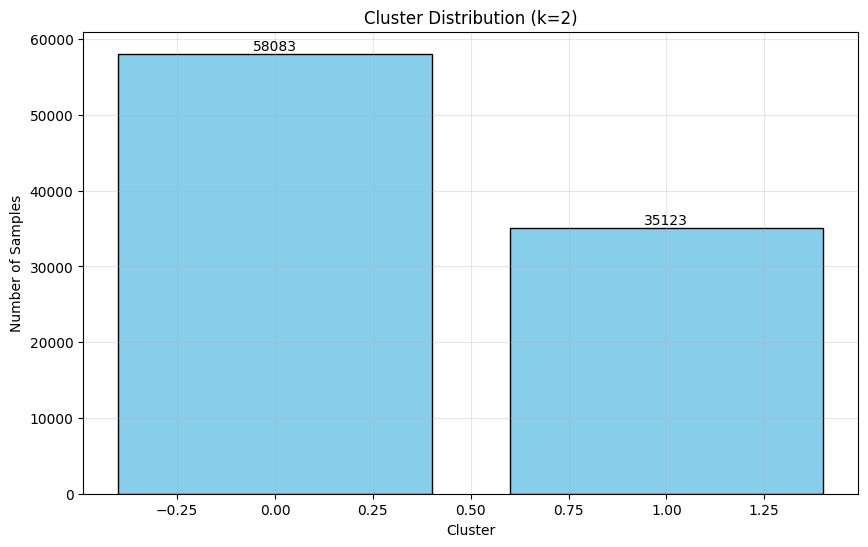

In [43]:
# Visualize cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts = df['cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title(f'Cluster Distribution (k={optimal_k})')
plt.grid(True, alpha=0.3)
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')
plt.show()

In [44]:
# Create movie recommendation system
def recommend_movies_by_cluster(movie_id, df, top_n=5):
    """
    Recommend movies based on cluster similarity
    """
    # Find the cluster of the given movie
    movie_cluster = df.loc[df['movie id'] == movie_id, 'cluster'].values
    
    if len(movie_cluster) == 0:
        print(f"Movie ID {movie_id} not found in dataset")
        return None
    
    movie_cluster = movie_cluster[0]
    
    # Get other movies in the same cluster
    same_cluster_movies = df[df['cluster'] == movie_cluster]
    
    # Exclude the input movie
    same_cluster_movies = same_cluster_movies[same_cluster_movies['movie id'] != movie_id]
    
    # Sort by rating and return top_n movies
    top_movies = same_cluster_movies.nlargest(top_n, 'rate')[['movie id', 'rate', 'cluster']]
    
    return top_movies

# Test the recommendation system
test_movie_id = df['movie id'].iloc[0]  # Use first movie as test
print(f"Testing recommendation for movie ID: {test_movie_id}")
recommendations = recommend_movies_by_cluster(test_movie_id, df, top_n=5)
if recommendations is not None:
    print("Recommended movies:")
    print(recommendations)


Testing recommendation for movie ID: 242
Recommended movies:
    movie id      rate  cluster
5        465  1.371226        0
9       1014  1.371226        0
10       222  1.371226        0
14       387  1.371226        0
24        95  1.371226        0


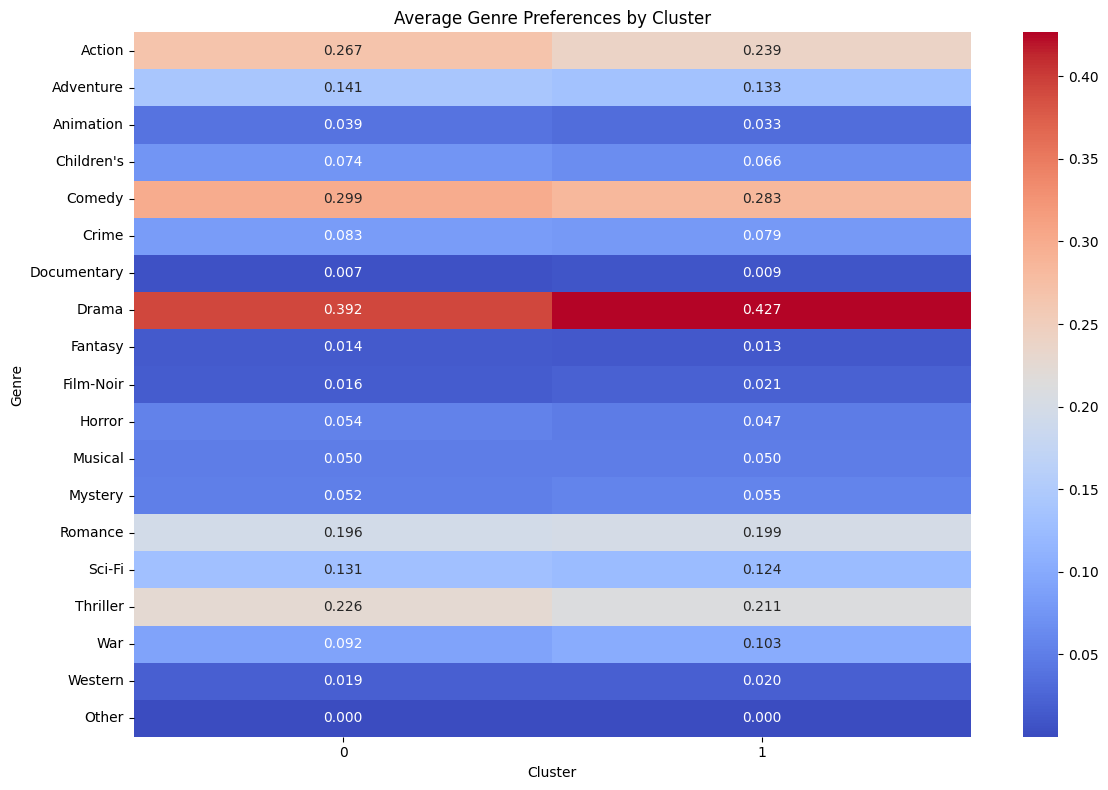

In [45]:
# Analyze genre preferences by cluster
genre_cols = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Other']

cluster_genre_preferences = df.groupby('cluster')[genre_cols].mean()

# Create heatmap for genre preferences
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_genre_preferences.T, cmap='coolwarm', annot=True, fmt='.3f')
plt.title('Average Genre Preferences by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [46]:
# Create cluster-movie matrix for recommendations (similar to GMM approach)
cluster_movies_ratings = df.groupby(['cluster', 'movie id'])['rate'].mean().reset_index()
cluster_movie_matrix = cluster_movies_ratings.pivot(index='movie id', columns='cluster', values='rate').fillna(0)

print(f"Cluster-Movie Matrix shape: {cluster_movie_matrix.shape}")
print("Top movies per cluster:")
for cluster in range(optimal_k):
    top_movies = cluster_movie_matrix.iloc[:, cluster].sort_values(ascending=False).head(5)
    print(f"Cluster {cluster}: Movie IDs {top_movies.index.tolist()}")


Cluster-Movie Matrix shape: (1611, 2)
Top movies per cluster:
Cluster 0: Movie IDs [341, 1306, 1529, 1536, 1653]
Cluster 1: Movie IDs [626, 1472, 1175, 1468, 1427]


In [47]:
# Save the trained model and cluster-movie matrix
model_save_path = '../../models/kmeans/kmeans_model.pkl'
matrix_save_path = '../../models/kmeans/cluster_movie_matrix.pkl'

# Create directory if it doesn't exist
import os
os.makedirs('../../models/kmeans', exist_ok=True)

# Save model and matrix
joblib.dump(kmeans_final, model_save_path)
joblib.dump(cluster_movie_matrix, matrix_save_path)

print(f"Model saved to: {model_save_path}")
print(f"Cluster-movie matrix saved to: {matrix_save_path}")


Model saved to: ../../models/kmeans/kmeans_model.pkl
Cluster-movie matrix saved to: ../../models/kmeans/cluster_movie_matrix.pkl


In [48]:
# Final evaluation metrics for the optimal model
final_silhouette = silhouette_score(X, clusters)
final_calinski = calinski_harabasz_score(X, clusters)
final_davies = davies_bouldin_score(X, clusters)

print("=== FINAL MODEL EVALUATION ===")
print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"Calinski-Harabasz Index: {final_calinski:.4f}")
print(f"Davies-Bouldin Score: {final_davies:.4f}")
print(f"Total samples: {len(df)}")
print(f"Cluster distribution: {dict(df['cluster'].value_counts().sort_index())}")

=== FINAL MODEL EVALUATION ===
Optimal number of clusters: 2
Silhouette Score: 0.6453
Calinski-Harabasz Index: 308421.8101
Davies-Bouldin Score: 0.4674
Total samples: 93206
Cluster distribution: {0: np.int64(58083), 1: np.int64(35123)}


In [49]:
# Test recommendation for new user (similar to GMM approach)
def recommend_for_new_user(user_preferences, kmeans_model, cluster_movie_matrix, top_n=5):
    """
    Recommend movies for a new user based on their preferences
    """
    # Convert user preferences to numpy array
    user_features = np.array([user_preferences]).reshape(1, -1)
    
    # Predict cluster for the user
    user_cluster = kmeans_model.predict(user_features)[0]
    
    # Get top movies from that cluster
    cluster_movies = cluster_movie_matrix.iloc[:, user_cluster].sort_values(ascending=False)
    top_movie_ids = cluster_movies.head(top_n).index.tolist()
    
    return top_movie_ids, user_cluster

# Example: New user preferences (Action + Comedy + Romance fan)
new_user_preferences = {
    'age': 25,
    'gender': 1,
    'occupation': 10,
    'Other': 0,
    'Action': 1,
    'Adventure': 0,
    'Animation': 0,
    "Children's": 0,
    'Comedy': 1,
    'Crime': 0,
    'Documentary': 0,
    'Drama': 0,
    'Fantasy': 0,
    'Film-Noir': 0,
    'Horror': 0,
    'Musical': 0,
    'Mystery': 0,
    'Romance': 1,
    'Sci-Fi': 0,
    'Thriller': 0,
    'War': 0,
    'Western': 0
}

# Convert to array format matching our features
user_array = [new_user_preferences[col] for col in X.columns]
recommended_movies, assigned_cluster = recommend_for_new_user(user_array, kmeans_final, cluster_movie_matrix, top_n=5)

print(f"New user assigned to cluster: {assigned_cluster}")
print(f"Recommended movie IDs: {recommended_movies}")


New user assigned to cluster: 1
Recommended movie IDs: [626, 1472, 1175, 1468, 1427]


C:\Users\Ishan Kanishka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [50]:
# Summary of K-Means Movie Recommendation System
print("=== K-MEANS MOVIE RECOMMENDATION SYSTEM SUMMARY ===")
print(f"✓ Dataset: {df.shape[0]} samples with {X.shape[1]} features")
print(f"✓ Optimal clusters: {optimal_k} (determined by comprehensive evaluation)")
print(f"✓ Model performance:")
print(f"  - Silhouette Score: {final_silhouette:.4f}")
print(f"  - Calinski-Harabasz Index: {final_calinski:.4f}")
print(f"  - Davies-Bouldin Score: {final_davies:.4f}")
print(f"✓ Cluster distribution: {dict(df['cluster'].value_counts().sort_index())}")
print(f"✓ Model saved to: {model_save_path}")
print(f"✓ Cluster-movie matrix saved to: {matrix_save_path}")
print(f"✓ Recommendation system: Ready for both existing and new users")
print("\n=== SYSTEM READY FOR DEPLOYMENT ===")


=== K-MEANS MOVIE RECOMMENDATION SYSTEM SUMMARY ===
✓ Dataset: 93206 samples with 22 features
✓ Optimal clusters: 2 (determined by comprehensive evaluation)
✓ Model performance:
  - Silhouette Score: 0.6453
  - Calinski-Harabasz Index: 308421.8101
  - Davies-Bouldin Score: 0.4674
✓ Cluster distribution: {0: np.int64(58083), 1: np.int64(35123)}
✓ Model saved to: ../../models/kmeans/kmeans_model.pkl
✓ Cluster-movie matrix saved to: ../../models/kmeans/cluster_movie_matrix.pkl
✓ Recommendation system: Ready for both existing and new users

=== SYSTEM READY FOR DEPLOYMENT ===


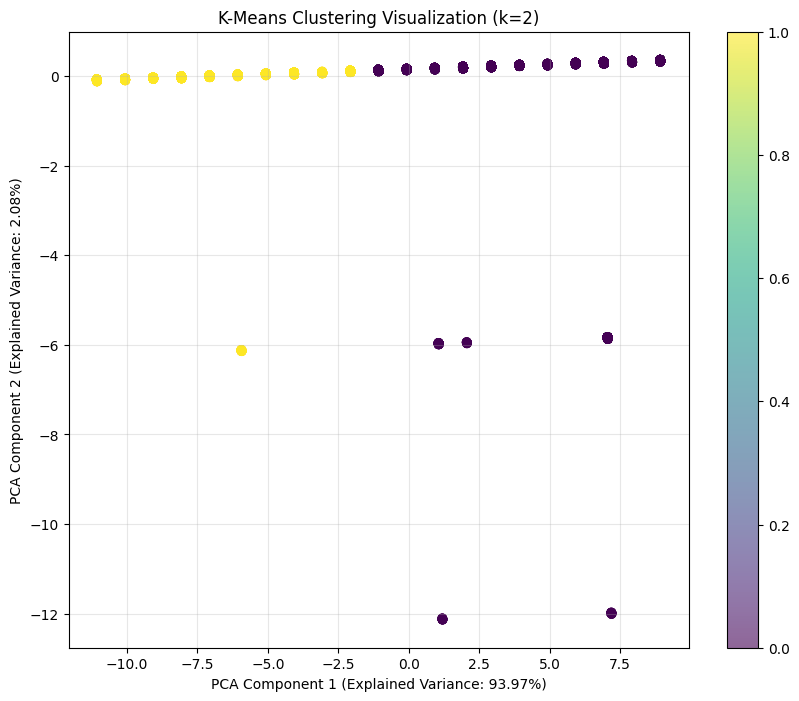

PCA explained variance ratio: [0.93971214 0.02084294]
Total explained variance: 96.06%


In [51]:
# Additional visualization: PCA for cluster visualization (optional)
from sklearn.decomposition import PCA

# Apply PCA for visualization purposes only
pca = PCA(n_components=2)
X_pca_viz = pca.fit_transform(X)

# Create scatter plot of clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_viz[:, 0], X_pca_viz[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel(f'PCA Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PCA Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title(f'K-Means Clustering Visualization (k={optimal_k})')
plt.grid(True, alpha=0.3)
plt.show()

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2%}")
